In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
data=pd.read_csv("mtcars.csv")

In [3]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
data.rename(columns = {'Unnamed: 0':'model'}, inplace = True) 

In [5]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
data.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [7]:
x = data.drop(columns = ["model","mpg"])
y=data["mpg"]

In [8]:
data.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

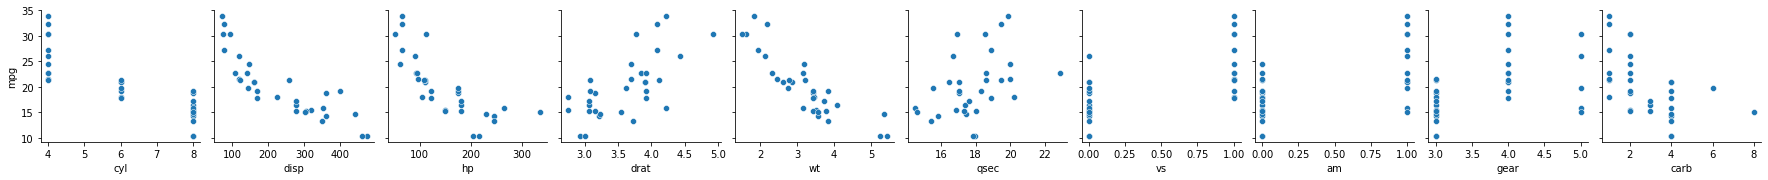

In [9]:
sns.pairplot(data, x_vars= ['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'], y_vars = "mpg")

### Correlation

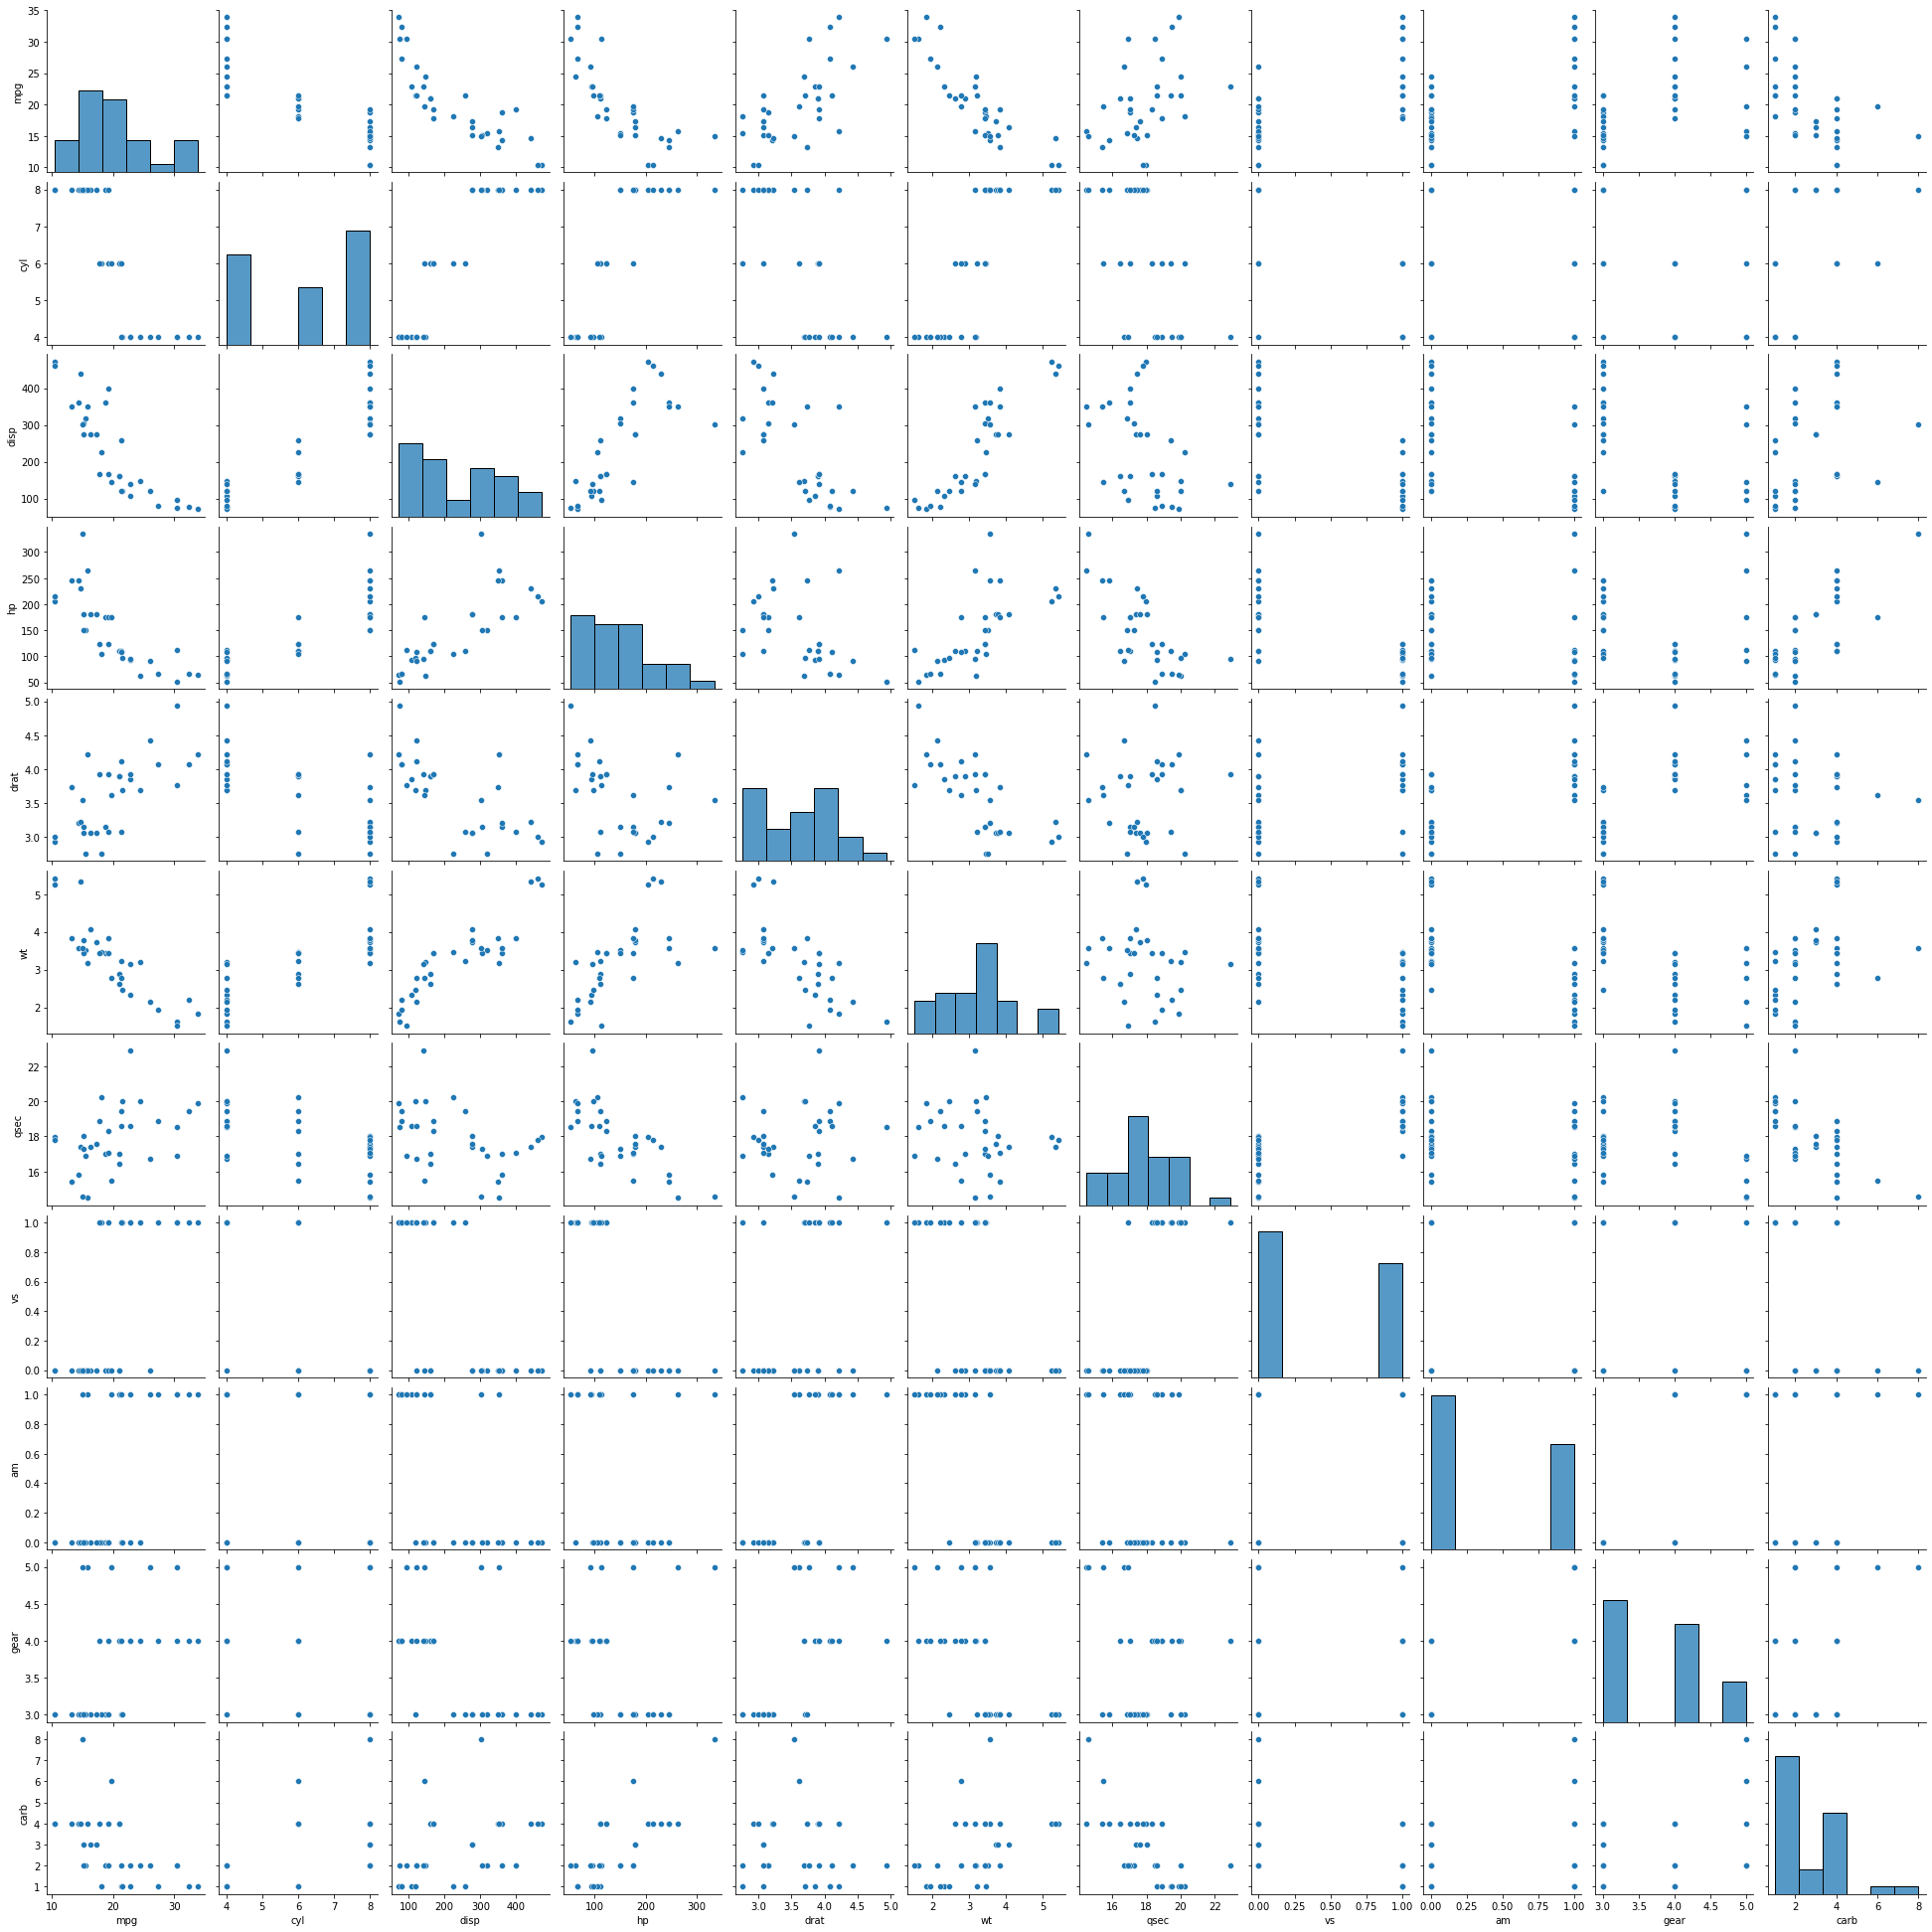

In [10]:
sns.pairplot(data = data)

In [11]:
data.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


<AxesSubplot:>

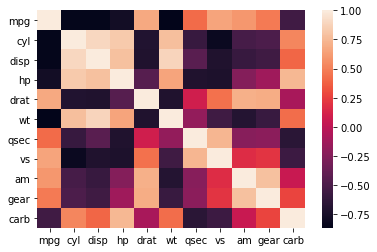

In [12]:
sns.heatmap(data.corr())  #dark color = negatively correlated #light color = positively correlated

<AxesSubplot:>

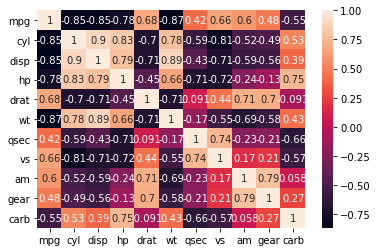

In [13]:
sns.heatmap(data.corr(), annot = True)  #annot to see annotation or values

<AxesSubplot:>

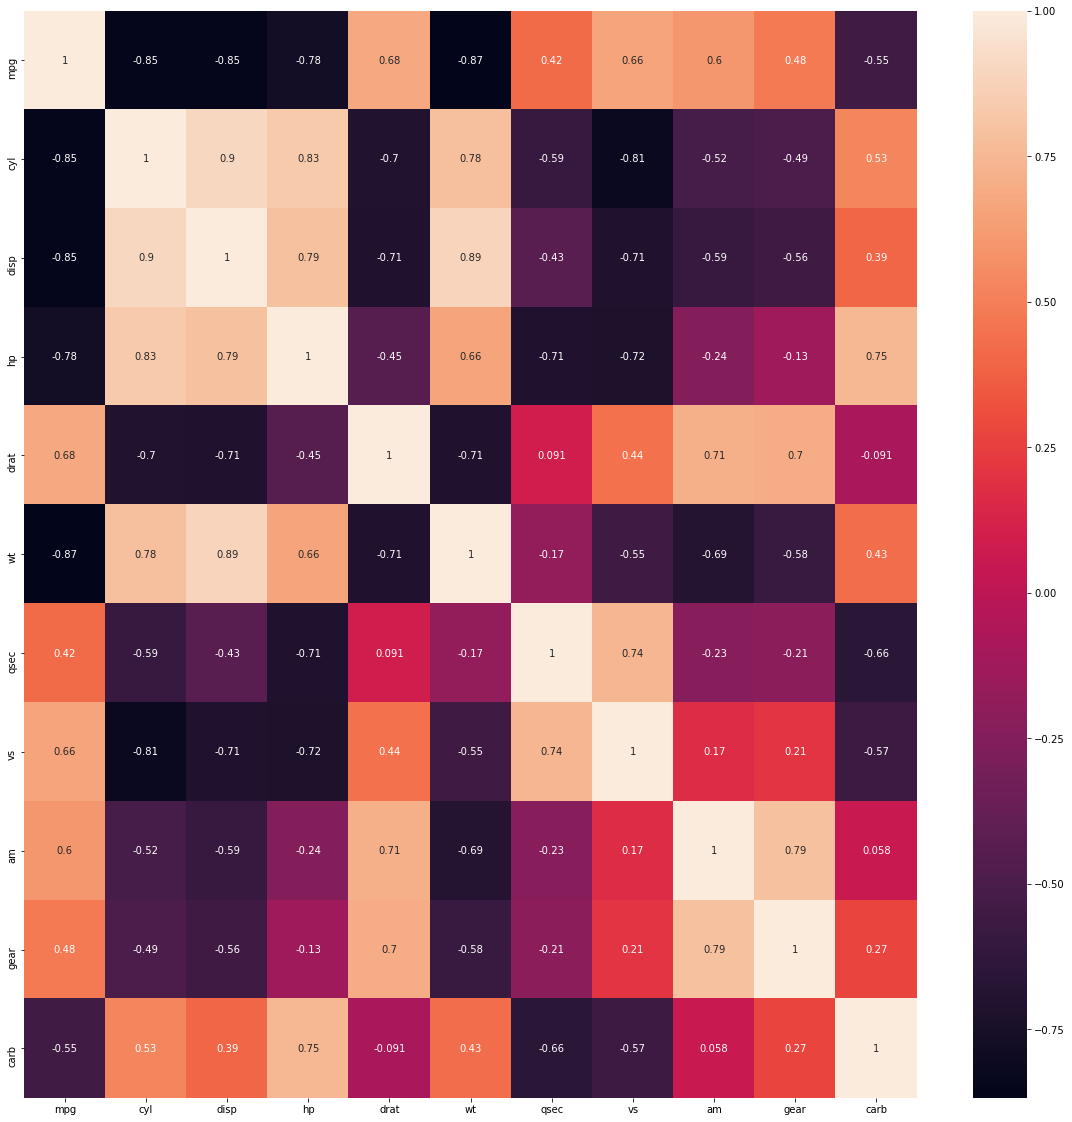

In [14]:
fig = plt.figure(figsize = (20,20))  #for size of the heatmap
sns.heatmap(data.corr(), annot = True)

In [15]:
from sklearn.linear_model import LinearRegression 

In [16]:
model = LinearRegression()

In [17]:
model.fit(x,y)

LinearRegression()

In [18]:
model.score(x,y)

0.8690157644777647

### Divide data in 80% training dataset and 20% testing dataset

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x , y , test_size = 0.2)

In [20]:
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.8750933601033057

In [21]:
ypred = model.predict(xtest)

In [22]:
data1 = pd.DataFrame({"Actual":ytest,"Predicted":ypred})
data1.head()

,Actual,Predicted
15,10.4,12.019692
2,22.8,26.726422
0,21.0,23.212813
27,30.4,25.699578
4,18.7,17.107219


In [23]:
data1 = pd.DataFrame({"Actual":np.array(ytest).flatten(),"Predicted":ypred})
data1.head()

,Actual,Predicted
0,10.4,12.019692
1,22.8,26.726422
2,21.0,23.212813
3,30.4,25.699578
4,18.7,17.107219


In [24]:
s = StandardScaler()
x_scale = s.fit_transform(x)
model.fit(x_scale,y)

LinearRegression()

In [25]:
model.score(x_scale,y)

0.8690157644777647

In [26]:
m = MinMaxScaler()
x_norm = m.fit_transform(x)
model.fit(x_norm,y)

LinearRegression()

In [27]:
model.score(x_norm,y)

0.8690157644777647

In [28]:
x_norm.shape

(32, 10)

### Residuals
***Actual Value - Predicted Value***

In [29]:
residuals = ytest - ypred

In [30]:
residuals

15   -1.619692
2    -3.926422
0    -2.212813
27    4.700422
4     1.592781
9     1.370502
29    0.578059
Name: mpg, dtype: float64

In [31]:
np.mean(residuals)

0.06897689098013769

<AxesSubplot:xlabel='mpg', ylabel='Count'>

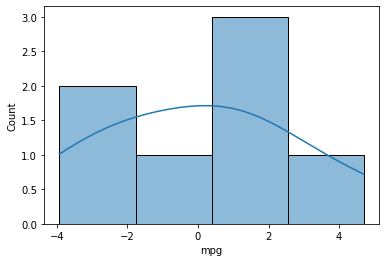

In [32]:
sns.histplot(residuals,kde = True)

### Outliers

<AxesSubplot:>

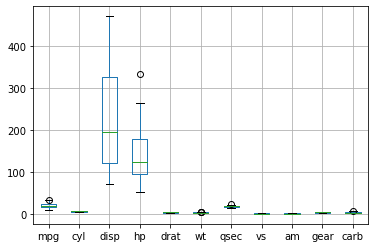

In [33]:
data.boxplot()

### IQR - Inter Quatile Range 
***Last Quartile - First Quartile***

- Q1 - First Quartile
- Q2 - Second Quartile
- Q3 - Third Quartile

***Q1-1.5xIQR to Q3+1.5xIQR***

In [36]:
q1 = data.quantile(0.25)
q1

mpg      15.42500
cyl       4.00000
disp    120.82500
hp       96.50000
drat      3.08000
wt        2.58125
qsec     16.89250
vs        0.00000
am        0.00000
gear      3.00000
carb      2.00000
Name: 0.25, dtype: float64

In [37]:
q3 = data.quantile(0.75)
q3

mpg      22.80
cyl       8.00
disp    326.00
hp      180.00
drat      3.92
wt        3.61
qsec     18.90
vs        1.00
am        1.00
gear      4.00
carb      4.00
Name: 0.75, dtype: float64

In [38]:
iqr = q3-q1
iqr

mpg       7.37500
cyl       4.00000
disp    205.17500
hp       83.50000
drat      0.84000
wt        1.02875
qsec      2.00750
vs        1.00000
am        1.00000
gear      1.00000
carb      2.00000
dtype: float64

In [39]:
(data < q1 - iqr * 1.5) | (data > q3 + iqr * 1.5) 

<ipython-input-39-597df14bd6c3>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (data < q1 - iqr * 1.5) |(data > q3 + iqr * 1.5)
<ipython-input-39-597df14bd6c3>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (data < q1 - iqr * 1.5) |(data > q3 + iqr * 1.5)


,am,carb,cyl,disp,drat,gear,hp,model,mpg,qsec,vs,wt
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
new_data = data[~((data < q1 - iqr * 1.5) |(data > q3 + iqr * 1.5)).any(axis =1)]

<ipython-input-44-a55835b39583>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  new_data = data[~((data < q1 - iqr * 1.5) |(data > q3 + iqr * 1.5)).any(axis =1)]
<ipython-input-44-a55835b39583>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  new_data = data[~((data < q1 - iqr * 1.5) |(data > q3 + iqr * 1.5)).any(axis =1)]


In [45]:
new_data.shape, data.shape

((26, 12), (32, 12))